In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from scipy import stats

import os
import math

In [2]:
## Move to correct folder for server.  Can remove before sending
os.chdir('/home/poblivsig/Dropbox/horses2')
print(os.getcwd())

/home/poblivsig/Dropbox/horses2


In [139]:
## Open the pre-processed csv
df = pd.read_csv('data/proc_races.csv')
print(df.shape)
# df = df.drop(df.index[0:140000], 0)
print(df.shape)

(149513, 32)
(149513, 32)


In [85]:
##
# df = df.reset_index()
#
# def clean_dataset(df):
#     assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
#     df.dropna(inplace=True)
#     indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
#     return df[indices_to_keep].astype(np.float64)
# df = clean_dataset(df)
# df = df.dropna()

In [140]:
## Split the data up.
y = df['res_win']
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('res_win', axis=1)
df = df.drop('margin', axis=1)
df = df.drop('decimalPrice', axis=1)
# df = df.drop('level_0', axis=1)
# df = df.drop('index', axis=1)
X = df.drop('res_place', axis=1)
# df = df.drop('position',axis=1)
# df = df.drop('first',axis=1)

print(df.shape)

(149513, 28)


In [17]:
## Plot the number of horses at different final positions
# sns.countplot(df['position'], label="Count")

<AxesSubplot:>

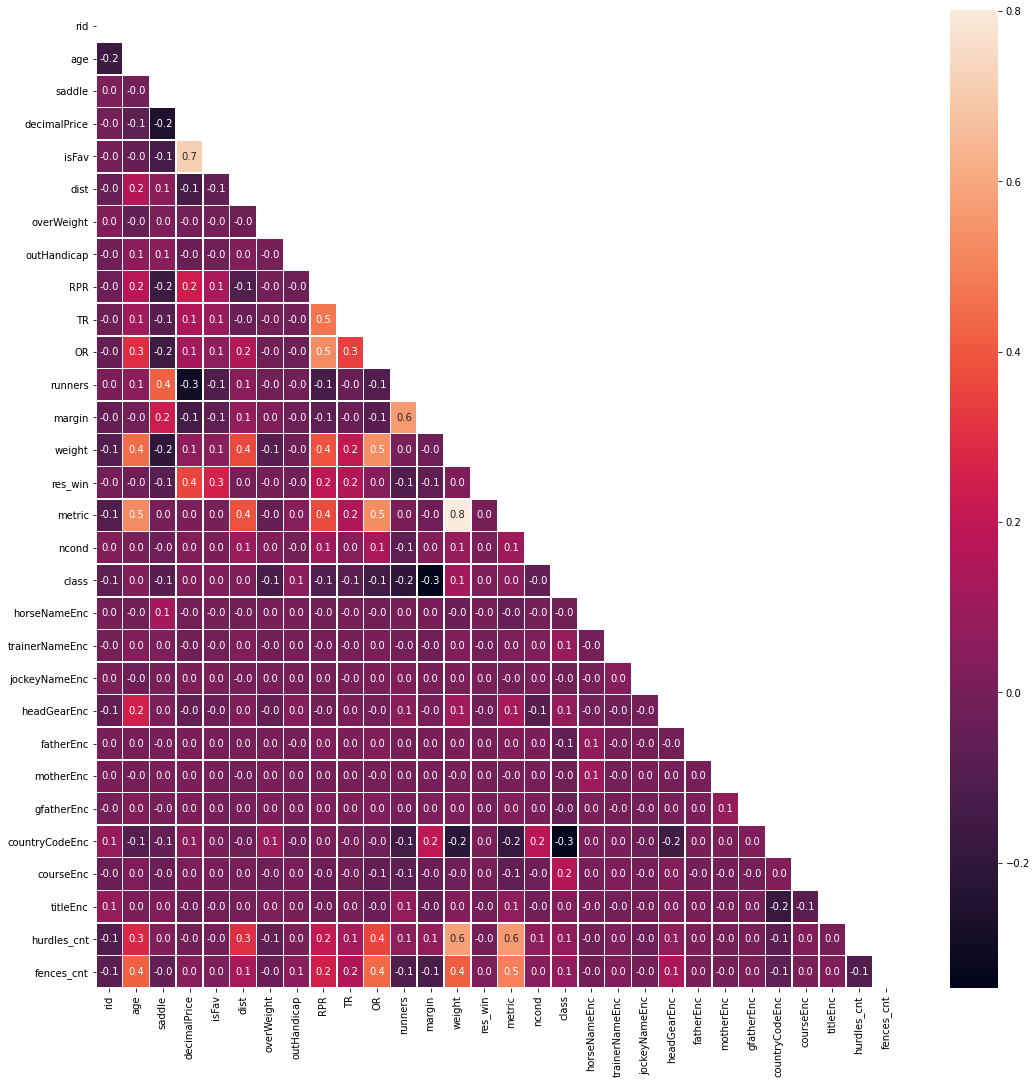

In [108]:
# Build a correlation matrix to find the attributes that correlate the most
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax, mask=matrix)

[]

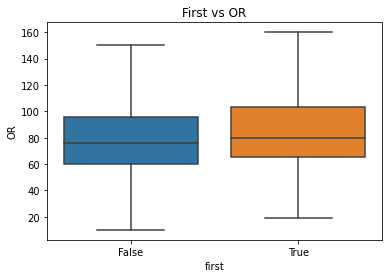

In [42]:
# Build boxplots for the most correlated and the first
## OR - Official Rating
plot = sns.boxplot(x='first', y='OR', data=df, showfliers=False)
plot.set_title('First vs OR')
plt.plot()

[]

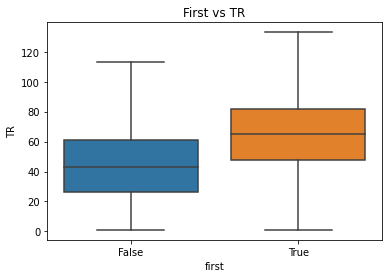

In [43]:
## TR - Top Speed
plot = sns.boxplot(x='first', y='TR', data=df, showfliers=False)
plot.set_title('First vs TR')
plt.plot()

[]

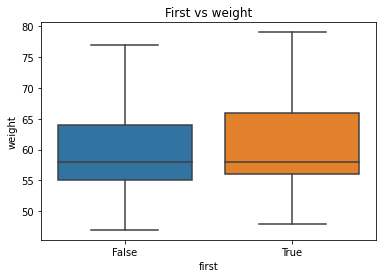

In [48]:
## weight - of horse is KG
plot = sns.boxplot(x='first', y='weight', data=df, showfliers=False)
plot.set_title('First vs weight')
plt.plot()

[]

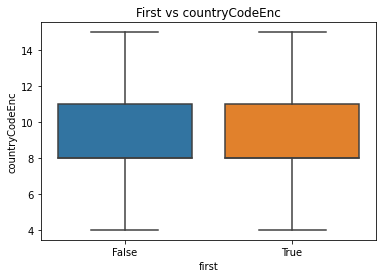

In [51]:
## countryCodeEnc
plot = sns.boxplot(x='first', y='countryCodeEnc', data=df, showfliers=False)
plot.set_title('First vs countryCodeEnc')
plt.plot()

In [141]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, stratify=y, random_state = 17)
print(df.shape)

(149513, 28)


In [142]:
#Feature Scaling
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
## Shrink dataset for testing
# num_to_shrink = 80000
# X_train = np.delete(X_train, slice(0 ,num_to_shrink, None), axis=0)
# y_train = np.delete(y_train, slice(0 ,num_to_shrink), axis=0)


In [41]:
#Using SVC linear
from sklearn.svm import SVC
svc_lin = SVC(kernel = 'linear', random_state = 0, max_iter=2000)
svc_lin.fit(X_train, y_train)

/home/poblivsig/Dropbox/horses2/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(kernel='linear', max_iter=2000, random_state=0)

In [ ]:
print('[1]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, y_train))

In [ ]:
#Using SVC rbf
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train, y_train)
print('[2]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, y_train))

[3]Decision Tree Classifier Training Accuracy: 1.0


In [143]:
#Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)
print('[4]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))

[4]Random Forest Classifier Training Accuracy: 0.9991082078321647


In [ ]:
#print model accuracy on the training data.
print('[0]Logistic Regression Training Accuracy:', log.score(X_train, y_train))
print('[2]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, y_train))
print('[3]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
print('[4]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, forest.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
# print(f'Testing Accuracy = {(TP + TN) / (TP + TN + FN + FP)}')
print()# Print a new line

In [83]:
print(type(y_test))

<class 'float'>


In [100]:
predictions = tree.predict(X_test)
pred_cmp = []
test_comp = []

for count, prediction in enumerate(predictions):
    if prediction == 1.0:
        pred_cmp.append(count)
    if count > 100:
        break

for count, y_testsss in enumerate(y_test):
    if y_testsss == 1.0:
        test_comp.append(count)
    if count > 100:
        break

print(pred_cmp)
print(test_comp)

[0, 4, 9, 10, 11, 12, 23, 25, 29, 30, 32, 34, 35, 43, 47, 52, 53, 61, 65, 66, 75, 81, 84, 86, 89, 96, 97, 99, 100]
[0, 2, 4, 6, 9, 11, 23, 25, 29, 30, 32, 34, 35, 44, 47, 48, 52, 61, 65, 66, 70, 71, 75, 76, 81, 84, 86, 87, 89, 91, 96, 97, 99]


In [74]:
print(y_test[0])


KeyError: 0

In [146]:
# for (columnName, _) in X_train.iteritems():
#     X_train[columnName] = X_train[columnName].astype(float)
# for (columnName, _) in y_train.iteritems():
#     y_train[columnName] = y_train[columnName].astype(float)
    # for count, pos in enumerate(dfn[columnName]):
    #     # if math.isinf(pos):
    #     # if not isinstance(pos, int) and not isinstance(pos, float):
    #         print(columnName, pos)

AttributeError: 'numpy.ndarray' object has no attribute 'iteritems'

In [121]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new = SelectKBest(chi2, k=8).fit_transform(X, y)
print(X_new.shape)

(149513, 8)
